In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import os
import ast



In [2]:
programms_df = pd.read_csv('data//degrees/programme_data.csv')
modules_df = pd.read_csv('data//modules/modul_key_facts_updated.csv')

In [3]:
programms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   degree           42 non-null     object 
 1   a_lvl_req        42 non-null     object 
 2   a_lvl_extra      23 non-null     object 
 3   modules_y1       42 non-null     object 
 4   modules_y2       42 non-null     object 
 5   modules_y3       42 non-null     object 
 6   nr_applications  40 non-null     float64
 7   intake           40 non-null     float64
 8   ratio            40 non-null     object 
 9   home_fee         42 non-null     object 
 10  median_salary    40 non-null     object 
dtypes: float64(2), object(9)
memory usage: 3.7+ KB


In [4]:
programms_df.head()

,degree,a_lvl_req,a_lvl_extra,modules_y1,modules_y2,modules_y3,nr_applications,intake,ratio,home_fee,median_salary
0,BA Anthropology and Law,AAB,NaN,"['LL141', 'AN100', 'AN101', 'LL142', 'LL108', ...","['AN253', 'AN379', 'LL106', 'LL143', 'LL200']",['LL276'],250.0,20.0,13:1,"£9,535","£34,500"
1,BA Geography,AAA,NaN,"['GY100', 'GY140', 'GY144', 'LSE100']","['GY245', 'GY246', 'GY212', 'GY204', 'GY206', ...",['GY350'],377.0,38.0,10:1,"£9,535","£35,000"
2,BA History,AAA,NaN,"['HY120', 'LSE100', 'EH101', 'HY113', 'HY116',...",[],['HY300'],503.0,58.0,9:1,"£9,535","£35,000"
3,BA Social Anthropology,AAB,NaN,"['AN100', 'AN101', 'AN102', 'LSE100']","['AN286', 'AN253', 'AN256', 'AN273', 'AN285', ...",['AN397'],232.0,30.0,8:1,"£9,535","£34,500"
4,BSc Accounting and Finance,AAA,with A in Mathematics,"['LSE100', 'AC105', 'AC106', 'ST107', 'FM101',...","['AC205', 'AC206', 'FM210', 'FM211', 'FM214', ...","['AC331', 'AC311', 'FM310', 'FM311']",2283.0,140.0,16:1,"£9,535","£35,000"


In [5]:
programms_df.isnull().sum()

degree              0
a_lvl_req           0
a_lvl_extra        19
modules_y1          0
modules_y2          0
modules_y3          0
nr_applications     2
intake              2
ratio               2
home_fee            0
median_salary       2
dtype: int64

In [6]:
programms_df_clean = programms_df

In [7]:
programms_df_clean['a_lvl_extra'] = programms_df_clean['a_lvl_extra'].fillna('None')

# Optional: Verify the change
print("Missing values in 'a_lvl_extra' after replacement:")
print(programms_df_clean['a_lvl_extra'].isnull().sum())

Missing values in 'a_lvl_extra' after replacement:
0


In [8]:
programms_df_clean.dropna(subset=['median_salary'], inplace=True)

print("Remaining missing values:\n", programms_df_clean.isnull().sum())

Remaining missing values:
 degree             0
a_lvl_req          0
a_lvl_extra        0
modules_y1         0
modules_y2         0
modules_y3         0
nr_applications    2
intake             2
ratio              2
home_fee           0
median_salary      0
dtype: int64


In [9]:
programms_df_clean['acceptance_perc'] = (programms_df_clean['intake']/programms_df_clean['nr_applications']).round(5)
programms_df_clean.head(3)

,degree,a_lvl_req,a_lvl_extra,modules_y1,modules_y2,modules_y3,nr_applications,intake,ratio,home_fee,median_salary,acceptance_perc
0,BA Anthropology and Law,AAB,None,"['LL141', 'AN100', 'AN101', 'LL142', 'LL108', ...","['AN253', 'AN379', 'LL106', 'LL143', 'LL200']",['LL276'],250.0,20.0,13:1,"£9,535","£34,500",0.08000
1,BA Geography,AAA,None,"['GY100', 'GY140', 'GY144', 'LSE100']","['GY245', 'GY246', 'GY212', 'GY204', 'GY206', ...",['GY350'],377.0,38.0,10:1,"£9,535","£35,000",0.10080
2,BA History,AAA,None,"['HY120', 'LSE100', 'EH101', 'HY113', 'HY116',...",[],['HY300'],503.0,58.0,9:1,"£9,535","£35,000",0.11531


In [10]:
programms_df_clean['home_fee'].value_counts()

home_fee
£9,535    40
Name: count, dtype: int64

In [11]:
programms_df_clean['median_salary'] = programms_df_clean['median_salary'].str.replace(',', '').str.replace('£', '').astype(float)

programms_df_clean.head(3)

,degree,a_lvl_req,a_lvl_extra,modules_y1,modules_y2,modules_y3,nr_applications,intake,ratio,home_fee,median_salary,acceptance_perc
0,BA Anthropology and Law,AAB,None,"['LL141', 'AN100', 'AN101', 'LL142', 'LL108', ...","['AN253', 'AN379', 'LL106', 'LL143', 'LL200']",['LL276'],250.0,20.0,13:1,"£9,535",34500.0,0.08000
1,BA Geography,AAA,None,"['GY100', 'GY140', 'GY144', 'LSE100']","['GY245', 'GY246', 'GY212', 'GY204', 'GY206', ...",['GY350'],377.0,38.0,10:1,"£9,535",35000.0,0.10080
2,BA History,AAA,None,"['HY120', 'LSE100', 'EH101', 'HY113', 'HY116',...",[],['HY300'],503.0,58.0,9:1,"£9,535",35000.0,0.11531


In [12]:
columns_to_drop = ['nr_applications', 'intake', 'ratio', 'home_fee']

programms_df_clean.drop(columns=columns_to_drop, inplace=True)

programms_df_clean.head(3)

,degree,a_lvl_req,a_lvl_extra,modules_y1,modules_y2,modules_y3,median_salary,acceptance_perc
0,BA Anthropology and Law,AAB,None,"['LL141', 'AN100', 'AN101', 'LL142', 'LL108', ...","['AN253', 'AN379', 'LL106', 'LL143', 'LL200']",['LL276'],34500.0,0.08000
1,BA Geography,AAA,None,"['GY100', 'GY140', 'GY144', 'LSE100']","['GY245', 'GY246', 'GY212', 'GY204', 'GY206', ...",['GY350'],35000.0,0.10080
2,BA History,AAA,None,"['HY120', 'LSE100', 'EH101', 'HY113', 'HY116',...",[],['HY300'],35000.0,0.11531


In [13]:
modules_df.head(3)

,code,course,department,total_students,avg_class_size,capped,units
0,AC102,Elements of Financial Accounting,Accounting,564.0,15.0,False,0.5
1,AC103,"Elements of Management Accounting, Financial M...",Accounting,256.0,18.0,False,0.5
2,AC105,Introduction to Financial Accounting,Accounting,115.0,39.0,False,0.5


In [14]:
modules_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   code            566 non-null    object 
 1   course          566 non-null    object 
 2   department      566 non-null    object 
 3   total_students  466 non-null    float64
 4   avg_class_size  459 non-null    float64
 5   capped          566 non-null    object 
 6   units           566 non-null    float64
dtypes: float64(3), object(4)
memory usage: 31.1+ KB


In [15]:
module_units_dict = modules_df.set_index('code')['units'].to_dict()

print("First 5 items in module_units_dict:")
print(dict(itertools.islice(module_units_dict.items(), 5)))

print(f"\\nTotal modules in dictionary: {len(module_units_dict)}")

First 5 items in module_units_dict:
{'AC102': 0.5, 'AC103': 0.5, 'AC105': 0.5, 'AC106': 0.5, 'AC205': 0.5}
\nTotal modules in dictionary: 566


In [16]:
# Function to safely evaluate string literals (like lists)
def parse_module_list(module_string):
    try:
        # Ensure it's a string before trying to evaluate
        if isinstance(module_string, str):
            parsed_list = ast.literal_eval(module_string)
            # Ensure the result is actually a list
            return parsed_list if isinstance(parsed_list, list) else []
        elif isinstance(module_string, list):
             # If it's already a list, return it as is
             return module_string
        else:
            # Handle other cases (like NaN, numbers) by returning empty list
            return []
    except (ValueError, SyntaxError, TypeError):
        # Handle strings that aren't valid list representations
        return [] # Return empty list on error

# Apply the function to the module columns
# Make sure to use the correct DataFrame name (e.g., df_clean)
programms_df_clean['modules_y1'] = programms_df_clean['modules_y1'].apply(parse_module_list)
programms_df_clean['modules_y2'] = programms_df_clean['modules_y2'].apply(parse_module_list)
programms_df_clean['modules_y3'] = programms_df_clean['modules_y3'].apply(parse_module_list)

# Optional: Verify the data type of the first element in one of the columns
print("Data type of the first element in 'modules_y1' after conversion:")
print(type(programms_df_clean['modules_y1'].iloc[0]))

# Optional: Display the first few rows to see the lists
print("\nFirst few rows with converted module lists:")
print(programms_df_clean[['degree', 'modules_y1', 'modules_y2', 'modules_y3']].head())

programms_df_clean.head(3)

Data type of the first element in 'modules_y1' after conversion:
<class 'list'>

First few rows with converted module lists:
                       degree  \
0     BA Anthropology and Law   
1                BA Geography   
2                  BA History   
3      BA Social Anthropology   
4  BSc Accounting and Finance   

                                          modules_y1  \
0  [LL141, AN100, AN101, LL142, LL108, LL100, LL1...   
1                      [GY100, GY140, GY144, LSE100]   
2        [HY120, LSE100, EH101, HY113, HY116, HY118]   
3                      [AN100, AN101, AN102, LSE100]   
4  [LSE100, AC105, AC106, ST107, FM101, EC1A3, EC...   

                                          modules_y2  \
0                [AN253, AN379, LL106, LL143, LL200]   
1         [GY245, GY246, GY212, GY204, GY206, GY207]   
2                                                 []   
3  [AN286, AN253, AN256, AN273, AN285, AN287, AN2...   
4  [AC205, AC206, FM210, FM211, FM214, FM215, EC2...   

  

,degree,a_lvl_req,a_lvl_extra,modules_y1,modules_y2,modules_y3,median_salary,acceptance_perc
0,BA Anthropology and Law,AAB,None,"[LL141, AN100, AN101, LL142, LL108, LL100, LL1...","[AN253, AN379, LL106, LL143, LL200]",[LL276],34500.0,0.08000
1,BA Geography,AAA,None,"[GY100, GY140, GY144, LSE100]","[GY245, GY246, GY212, GY204, GY206, GY207]",[GY350],35000.0,0.10080
2,BA History,AAA,None,"[HY120, LSE100, EH101, HY113, HY116, HY118]",[],[HY300],35000.0,0.11531


In [24]:
import pandas as pd # Make sure pandas is imported

# Assuming 'programms_df_clean' and 'module_units_dict' are defined

def calculate_total_units(df, module_col_name, units_dict):
    """
    Calculates the sum of units for module lists in a DataFrame column.

    Args:
        df (pd.DataFrame): The DataFrame containing the module list column.
        module_col_name (str): The name of the column with lists of modules.
        units_dict (dict): A dictionary mapping module codes to unit values.

    Returns:
        list: A list containing the total unit sum for each row.
    """
    total_units_list = []
    warnings_issued = set() # Keep track of warnings to avoid repetition

    for modules in df[module_col_name]:
        programm_unit_sum = 0
        if isinstance(modules, list): # Ensure 'modules' is actually a list
            for module in modules:
                unit_value = units_dict.get(module, 0) # Default to 0 if not found

                # Check if the module was ACTUALLY missing from the dictionary
                if module not in units_dict and module not in warnings_issued:
                     print(f"Warning: Module '{module}' (from column '{module_col_name}') not found in dictionary. Adding 0 units.")
                     warnings_issued.add(module) # Add to set to prevent repeated warnings for the same module

                # Accumulate the sum
                programm_unit_sum += unit_value
        # else: # Optionally handle non-list entries differently if needed
        #     print(f"Warning: Expected a list in {module_col_name}, but got {type(modules)}. Treating as 0 units.")

        total_units_list.append(programm_unit_sum)

    return total_units_list

# --- Apply the function to each year's module column ---

# Calculate Year 1 units
y1_unit_sums = calculate_total_units(programms_df_clean, 'modules_y1', module_units_dict)
programms_df_clean['y1_total_units'] = y1_unit_sums
print("Calculated Year 1 total units.")

# Calculate Year 2 units
y2_unit_sums = calculate_total_units(programms_df_clean, 'modules_y2', module_units_dict)
programms_df_clean['y2_total_units'] = y2_unit_sums
print("Calculated Year 2 total units.")

# Calculate Year 3 units
y3_unit_sums = calculate_total_units(programms_df_clean, 'modules_y3', module_units_dict)
programms_df_clean['y3_total_units'] = y3_unit_sums
print("Calculated Year 3 total units.")


# --- Verification ---
print("\nDataFrame with total units added:")
# Display relevant columns
print(programms_df_clean[['degree', 'y1_total_units', 'y2_total_units', 'y3_total_units']].head())

programms_df_clean.head(5)

Calculated Year 1 total units.
Calculated Year 2 total units.
Calculated Year 3 total units.

DataFrame with total units added:
                       degree  y1_total_units  y2_total_units  y3_total_units
0     BA Anthropology and Law             4.5             3.0             1.0
1                BA Geography             3.5             3.0             1.0
2                  BA History             5.5             0.0             1.0
3      BA Social Anthropology             3.5             4.5             1.0
4  BSc Accounting and Finance             5.5             6.0             2.0


,degree,a_lvl_req,a_lvl_extra,modules_y1,modules_y2,modules_y3,median_salary,acceptance_perc,y1_total_units,y2_total_units,y3_total_units
0,BA Anthropology and Law,AAB,None,"[LL141, AN100, AN101, LL142, LL108, LL100, LL1...","[AN253, AN379, LL106, LL143, LL200]",[LL276],34500.0,0.08000,4.5,3.0,1.0
1,BA Geography,AAA,None,"[GY100, GY140, GY144, LSE100]","[GY245, GY246, GY212, GY204, GY206, GY207]",[GY350],35000.0,0.10080,3.5,3.0,1.0
2,BA History,AAA,None,"[HY120, LSE100, EH101, HY113, HY116, HY118]",[],[HY300],35000.0,0.11531,5.5,0.0,1.0
3,BA Social Anthropology,AAB,None,"[AN100, AN101, AN102, LSE100]","[AN286, AN253, AN256, AN273, AN285, AN287, AN2...",[AN397],34500.0,0.12931,3.5,4.5,1.0
4,BSc Accounting and Finance,AAA,with A in Mathematics,"[LSE100, AC105, AC106, ST107, FM101, EC1A3, EC...","[AC205, AC206, FM210, FM211, FM214, FM215, EC2...","[AC331, AC311, FM310, FM311]",35000.0,0.06132,5.5,6.0,2.0


In [18]:
programms_df_clean['median_salary'].describe()

count       40.000000
mean     37137.500000
std       6720.603128
min      27500.000000
25%      35000.000000
50%      35500.000000
75%      36500.000000
max      65000.000000
Name: median_salary, dtype: float64

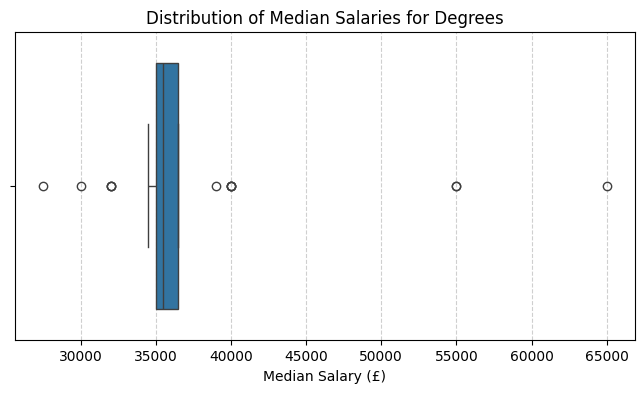

In [19]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=programms_df_clean['median_salary'])
plt.title('Distribution of Median Salaries for Degrees')
plt.xlabel('Median Salary (£)')
plt.grid(axis='x', linestyle='--', alpha=0.6) 
plt.show()

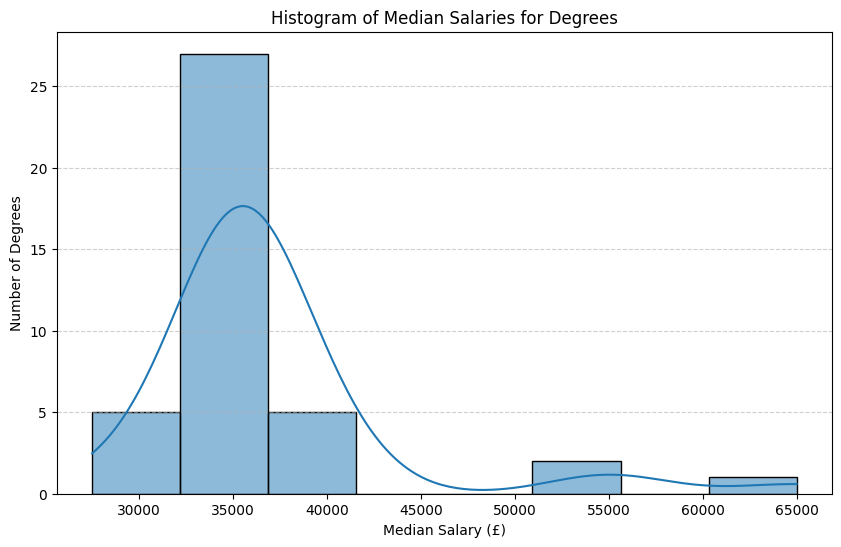

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(data=programms_df_clean, x='median_salary', bins=8, kde=True) # Using 8 bins and adding a density curve
plt.title('Histogram of Median Salaries for Degrees')
plt.xlabel('Median Salary (£)')
plt.ylabel('Number of Degrees')
plt.grid(axis='y', linestyle='--', alpha=0.6) 
plt.show()

/var/folders/ph/gn9x2hzd2tz602rpmqc3dh_00000gn/T/ipykernel_51331/925024168.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=programms_df_top_salary, y='degree', x='median_salary', palette='viridis')


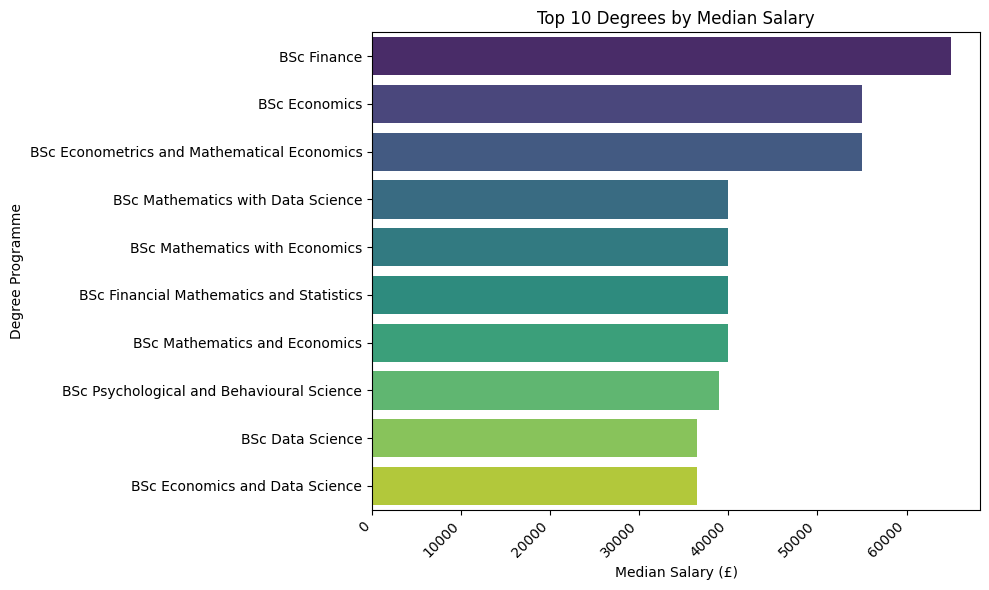

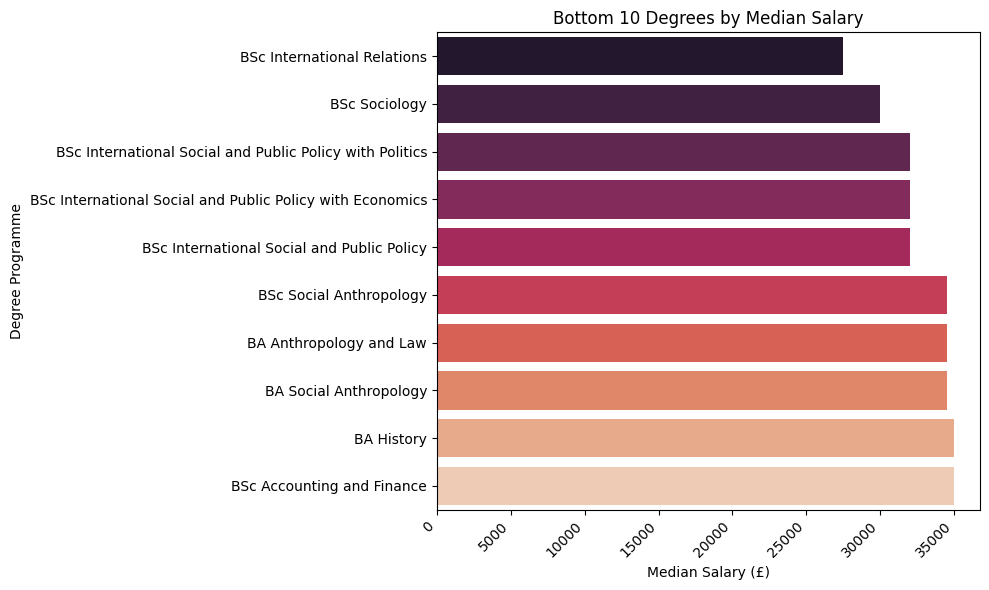

In [21]:
# --- Top 10 Degrees by Median Salary ---
top_n = 10
programms_df_top_salary = programms_df_clean.sort_values('median_salary', ascending=False).head(top_n)

plt.figure(figsize=(10, 6))
sns.barplot(data=programms_df_top_salary, y='degree', x='median_salary', palette='viridis')
plt.title(f'Top {top_n} Degrees by Median Salary')
plt.xlabel('Median Salary (£)')
plt.ylabel('Degree Programme')
plt.xticks(rotation=45, ha='right') # Improve x-axis label readability if needed
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

# --- Bottom 10 Degrees by Median Salary ---
bottom_n = 10
programms_df_bottom_salary = programms_df_clean.sort_values('median_salary', ascending=True).head(bottom_n)

plt.figure(figsize=(10, 6))
# Corrected line: Added hue='degree' and legend=False
sns.barplot(data=programms_df_bottom_salary, y='degree', x='median_salary', palette='rocket', hue='degree', legend=False)
plt.title(f'Bottom {bottom_n} Degrees by Median Salary')
plt.xlabel('Median Salary (£)')
plt.ylabel('Degree Programme')
plt.xticks(rotation=45, ha='right') # Improve x-axis label readability if needed
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()


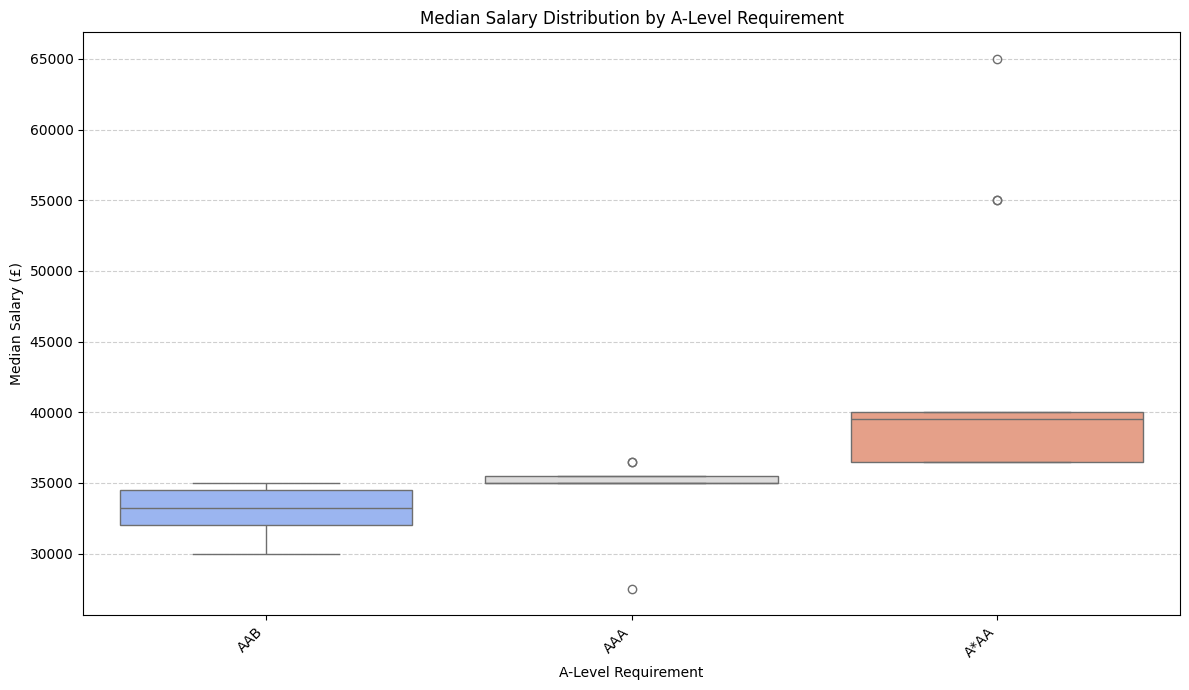

In [22]:
# Define a sensible order for A-level requirements if needed
requirement_order = sorted(programms_df_clean['a_lvl_req'].unique(), reverse=True) # Simple reverse alphabetical sort

plt.figure(figsize=(12, 7))
# Corrected line: Added hue='a_lvl_req' and legend=False
sns.boxplot(data=programms_df_clean, x='a_lvl_req', y='median_salary', order=requirement_order, palette='coolwarm', hue='a_lvl_req', legend=False)

plt.title('Median Salary Distribution by A-Level Requirement')
plt.xlabel('A-Level Requirement')
plt.ylabel('Median Salary (£)')
plt.xticks(rotation=45, ha='right') # Rotate labels if they overlap
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

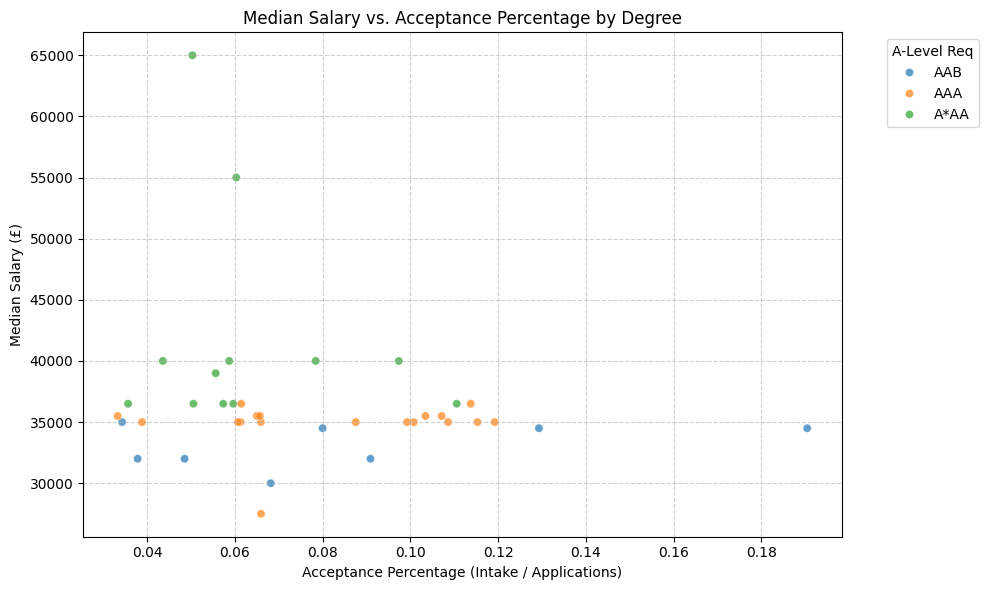

Correlation between Acceptance Percentage and Median Salary: -0.16


In [23]:
plt.figure(figsize=(10, 6))
# Corrected line: Removed size='home_fee' and sizes=(50, 200)
sns.scatterplot(data=programms_df_clean, x='acceptance_perc', y='median_salary', hue='a_lvl_req', alpha=0.7)

plt.title('Median Salary vs. Acceptance Percentage by Degree')
plt.xlabel('Acceptance Percentage (Intake / Applications)')
plt.ylabel('Median Salary (£)')
plt.grid(linestyle='--', alpha=0.6)
# Corrected legend title
plt.legend(title='A-Level Req', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Optional: Calculate and print the correlation coefficient
correlation = programms_df_clean['acceptance_perc'].corr(programms_df_clean['median_salary'])
print(f"Correlation between Acceptance Percentage and Median Salary: {correlation:.2f}")